In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 44.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import plotly
import numpy as np
import cufflinks as cf

In [12]:
data=pd.read_csv('/content/drive/My Drive/data.csv')


In [13]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [14]:
print(data.shape)
print(data.columns)

(169909, 19)
Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [15]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [17]:
print('numerical columns are:\n{}'.format(numeric_data.columns))
print('Categorical columns are:\n{}'.format(categorical_data.columns))

numerical columns are:
Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')
Categorical columns are:
Index(['artists', 'id', 'name', 'release_date'], dtype='object')


In [18]:
numeric_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [19]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=numeric_data['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=numeric_data['energy'],name='Energy'))
fig.add_trace(go.Box(y=numeric_data['danceability'],name='Danceability'))
fig.add_trace(go.Box(y=numeric_data['liveness'],name='liveness'))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
fig = go.Figure(go.Box(y=numeric_data['popularity'],name='Popularity'))
fig.show()

In [21]:
fig = go.Figure(go.Scatter(y=numeric_data['popularity'],name='Popularity'))
fig.show()

In [22]:
fig = go.Figure(go.Histogram(x=numeric_data['year']))
fig.show()

In [23]:
categorical_data.columns

Index(['artists', 'id', 'name', 'release_date'], dtype='object')

In [24]:
print(categorical_data['artists'].nunique())

33375


In [25]:
n_artists=categorical_data['artists'].value_counts().head(10)
print(n_artists)

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64


In [26]:
fig = go.Figure(go.Bar(y=n_artists,name='Artists VS Number of songs'))
fig.show()

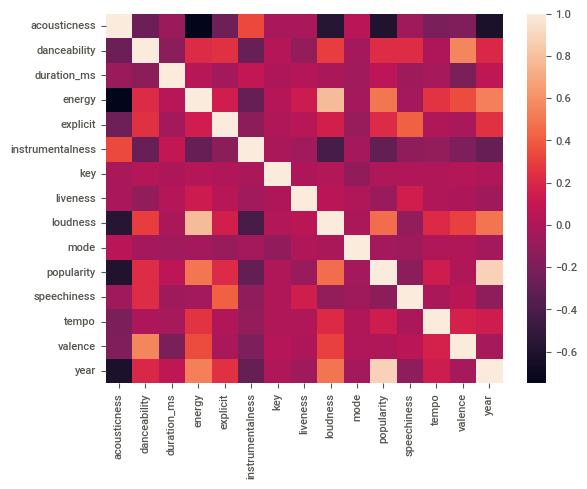

In [27]:
corrMatrix=numeric_data.corr()
sns.heatmap(corrMatrix)
plt.show()